In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import chainer
import chainer.links as L
import chainer.functions as F
from chainer.training import extensions

import os

print("step1")

step1


In [2]:
# define class and function
class MultiLayerPerceptron(chainer.Chain):
    """Class of deep neural network(DNN) description
    
    Args:
        nodes(list of int):Nodes of network layers
        dropout(float):Dropout ratio
    """
    
    def __init__(self,nodes):
        super(MultiLayerPerceptron, self).__init__()
        self.nodes = nodes
        self.layers = len(self.nodes)
        for i in range(self.layers-1):
            self.add_link("l{}".format(i), L.Linear(self.nodes[i], self.nodes[i+1]))
            
    def __call__(self,x):
        """Return predictive values.
        
        Args:
            x([chainer]Variable):Input of DNN
        Returns:
            y([chainer]Variable):Output of DNN
        """
        y = self["l0"](x)
        for i in range(self.layers-2):
            h = F.relu(y)
            y = self["l{}".format(i+1)](h)
        return y
    
def train_test_tuple_dataset(x,y,test_ratio):
    """Make training & testing data set.

    Args:
        x([numpy]ndarray):Input series
        y([numpy]ndarray):Output series
        test_ratio(float):Test data ratio in (0,1)
    """
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = test_ratio,random_state = False)
    train = chainer.datasets.TupleDataset(x_train, y_train)
    test = chainer.datasets.TupleDataset(x_test, y_test)
    return train,test
    
def myplot(p,y,color='blue'):
    """Plot predict values and actual values.

    Args:
        p([numpy]ndarray):Predict values
        y([numpy]ndarray):Actual values
        color(str):Graph color name
    """
    y_ncol = y.shape[1]
    e = (p-y)/y*100
    means = np.average(e,axis=0)
    sds = np.std(e,axis = 0)
    fig, axes = plt.subplots(nrows=1,ncols=y_ncol,figsize=(3.5*y_ncol,2.5),sharex=True,sharey=True)
    for i in range(y_ncol):
        if y_ncol>1:
            ax = axes[i]
        else:
            ax = axes
        yimax = (1.05*max([p[:,i].max(),y[:,i].max()]))
        ax.grid(color = 'lightgray', linestyle='--')
        ax.scatter(p[:,i], y[:,i], color = color,
                  label="N:{0}\nmean: {1:.2f}%\nsd: {2:.2f}%".format(len(y), means[i],sds[i]))
        ax.plot([0, yimax], [0, yimax])
        ax.legend()

print("step2")

step2


In [3]:
#define csv file
data_csv_file = "5411.csv"

#input columns' name
x_columns = ['Open']

#predict columns' name
y_columns = ['Close']

#network parameters
layer_number = 3
#hidden_node_number = 5
hidden_node_number = 100


#training conditions
io_normalization = False
train_data_number = 1000
epoch_number = 50
batch_size = 100
optimizer = chainer.optimizers.Adam()
mylossfun = F.mean_squared_error
myaccfun = F.r2_score

gpu_device = -1 #IF you use gpu, set gpu number(e.g. gpu_device = 0)

#ﾃﾞｨﾚｸﾄﾘ変更
os.chdir("C:\\Users\\Owner\\Desktop\ML\\6_Data File\\1_Stock Data")

#make data set
df = pd.read_csv(data_csv_file, sep=',')

xs = df[x_columns]
ys = df[y_columns]

if io_normalization:
    from sklearn.preprocessing import StandardScaler
    x_scaler = StandardScaler()
    y_scaler = StandardScaler()
    xs_f = x_scaler.fit_transform(xs).astype(np.float32)
    ys_f = y_scaler.fit_transform(ys).astype(np.float32)
else:
    x_scaler = None
    y_scaler = None
    xs_f = xs.values.astype(np.float32)
    ys_f = ys.values.astype(np.float32)
    
assert train_data_number < df.shape[0]
test_ratio = 1-train_data_number/df.shape[0]
train, test = train_test_tuple_dataset(xs_f, ys_f, test_ratio)

nodes = [hidden_node_number]*layer_number
nodes[0] = len(x_columns)
nodes[-1] = len(y_columns)

xx = np.array([_x for _x in np.array(train)[:,1]])

print("step3")

step3


In [4]:
#define multilayer perceptron network
model = L.Classifier(MultiLayerPerceptron(nodes),
                    lossfun = mylossfun,
                    accfun = myaccfun)

#setup training enviroments
optimizer.setup(model)
train_iter = chainer.iterators.SerialIterator(train, batch_size)
test_iter = chainer.iterators.SerialIterator(test, batch_size, repeat=False, shuffle = False)
updater = chainer.training.StandardUpdater(train_iter, optimizer, device = gpu_device)
trainer = chainer.training.Trainer(updater, (epoch_number, 'epoch'))

#xx = np.array([_x for _x in np.array(train_iter)[:]])

trainer.extend(extensions.Evaluator(test_iter, model, device = gpu_device))
trainer.extend(extensions.LogReport())
trainer.extend(extensions.PrintReport(['epoch',
                                      'iteration',
                                      'elapsed_time',
                                      'main/loss',
                                      'validation/main/loss',
                                      'main/accuracy',
                                      'validation/main/accuracy']))


#exec.training
trainer.run()

if gpu_device >= 0:
    model.to_cpu()

1
1
1
1
epoch       iteration   elapsed_time  main/loss   validation/main/loss  main/accuracy  validation/main/accuracy
2
2
2
2
3
3
3
3
4
4
4
4
5
5
5
5
6
6
6
6
7
7
7
7
8
8
8
8
9
9
9
9
10
10
10
10
1           10          0.0601116     4.00984e+06  2.37081e+06           -17.1245       -9.66925                  
11
11
11
11
12
12
12
12
13
13
13
13
14
14
14
14
15
15
15
15
16
16
16
16
17
17
17
17
18
18
18
18
19
19
19
19
20
20
20
20
2           20          0.125246      1.47765e+06  629845                -5.83174       -1.83435                  
21
21
21
21
22
22
22
22
23
23
23
23
24
24
24
24
25
25
25
25
26
26
26
26
27
27
27
27
28
28
28
28
29
29
29
29
30
30
30
30
3           30          0.172306      298715      53052.3               -0.341964      0.761358                  
31
31
31
31
32
32
32
32
33
33
33
33
34
34
34
34
35
35
35
35
36
36
36
36
37
37
37
37
38
38
38
38
39
39
39
39
40
40
40
40
4           40          0.226999      14201       9142.38               0.939154       0.958931     

320
32          320         3.07286       1199.78     1289.21               0.99455        0.994283                  
321
321
321
321
322
322
322
322
323
323
323
323
324
324
324
324
325
325
325
325
326
326
326
326
327
327
327
327
328
328
328
328
329
329
329
329
330
330
330
330
33          330         3.13891       1199.99     1287.56               0.994606       0.994291                  
331
331
331
331
332
332
332
332
333
333
333
333
334
334
334
334
335
335
335
335
336
336
336
336
337
337
337
337
338
338
338
338
339
339
339
339
340
340
340
340
34          340         3.19897       1199.69     1287.91               0.994558       0.994289                  
341
341
341
341
342
342
342
342
343
343
343
343
344
344
344
344
345
345
345
345
346
346
346
346
347
347
347
347
348
348
348
348
349
349
349
349
350
350
350
350
35          350         3.2603        1199.5      1287.8                0.99451        0.99429                   
351
351
351
351
352
352
352
352
353
353
353
353
354
354
354


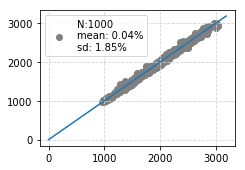

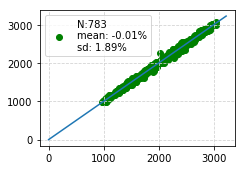

In [5]:
def myplot_aux(model, tuple_dataset, y_scaler = None):
    x = np.array([_x for _x in np.array(tuple_dataset)[:,0]])
    t = np.array([_t for _t in np.array(tuple_dataset)[:,1]])
    
    y = model(x).data
    if y_scaler is not None:
        t = y_scaler.inverse_transform(t)
        y = y_scaler.inverse_transform(y)
    return t, y
model.predictor
t, y = myplot_aux(model.predictor, train, y_scaler)
myplot(t, y, color = 'gray')
t, y = myplot_aux(model.predictor, test, y_scaler)
myplot(t, y, color='green')

try:
    y_sch = df[y_columns].values
    p_sch = df[[col + 'sch' for col in y_columns]].values
    myplot(y_sch, p_sch)
except:
    pass

plt.show()

In [6]:
#ﾓﾃﾞﾙの中身(重み,ﾊﾞｲｱｽ、各種条件をcsv出力)
W0 = model.predictor["l{}".format(0)].W.data
b0 = model.predictor["l{}".format(0)].b.data
W1 = model.predictor["l{}".format(1)].W.data
b1 = model.predictor["l{}".format(1)].b.data
#W2 = model.predictor["l{}".format(2)].W.data
#W2 = W2.T
#b2 = model.predictor["l{}".format(2)].b.data
np.set_printoptions( suppress=True)

W0_p = pd.DataFrame(W0)
b0_p = pd.DataFrame(b0)
W1_p = pd.DataFrame(W1)
b1_p = pd.DataFrame(b1)
#W2_p = pd.DataFrame(W2)
#b2_p = pd.DataFrame(b2)

W0_name = pd.DataFrame(['W0='])
b0_name = pd.DataFrame(['b0='])
W1_name = pd.DataFrame(['W1='])
b1_name = pd.DataFrame(['b1='])
#W2_name = pd.DataFrame(['W2='])
#b2_name = pd.DataFrame(['b2='])

df = pd.concat([W0_name,W0_p,
                b0_name,b0_p,
                W1_name,W1_p,
                b1_name,b1_p,
#                W2_name,W2_p,
#                b2_name,b2_p
               ], axis = 1)
i = [1]

#input columns' name
df_con = pd.DataFrame({ '0_in' : i,
                        '1_io_normalization' : io_normalization,
                        '2_epoch_number' : epoch_number,
                        '3_train_data_number' : train_data_number,
                        '4_epoch_number' : epoch_number,
                        '5_batch_size' : batch_size,
                        '6_optimizer' : 'Adam',
                        '7_mylossfun' : 'MSE',
                        '8_layer_number' : layer_number,
                        '9_hidden_node_number' : hidden_node_number,
                        'A_read_file' : data_csv_file,
                        'B_input' : x_columns,
                        'C_output': y_columns})

df = pd.concat([df,df_con], axis = 1)

df.to_csv('DNN_parameters2.csv',index = False)